<a href="https://colab.research.google.com/github/tiagopessoalima/IA/blob/main/Aula_Semana_03_(IA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multi-Layer Perceptron (MLP)**

Este material aborda redes neurais artificiais do tipo MLP, integrando fundamentos teóricos com implementações práticas. Serão apresentados os princípios matemáticos, a arquitetura das redes, os algoritmos de treinamento, bem como exemplos de aplicação.

## **O que é uma Rede Neural?**

Uma rede neural é um modelo computacional inspirado no funcionamento do cérebro humano, composto por unidades chamadas neurônios artificiais, que se interconectam para aprender padrões a partir de dados. MLP é um tipo específico de rede neural *feedforward*, caracterizado por possuir múltiplas camadas — de entrada, ocultas e de saída. Essa estrutura permite ao MLP capturar relações não lineares complexas, sendo amplamente utilizado em tarefas de aprendizado supervisionado, como classificação e regressão.

> **Nota:** *Feedforward* refere-se ao fluxo unidirecional dos dados através da rede, iniciando na camada de entrada, passando sequencialmente por uma ou mais camadas ocultas, até alcançar a camada de saída — sem ciclos ou retroalimentação

## **Histórico e Aplicações Práticas**

Tem suas origens em 1943, quando McCulloch e Pitts propuseram o primeiro modelo de neurônio artificial. Em 1958, Rosenblatt avançou a ideia ao introduzir o *perceptron* de camada única. A verdadeira revolução veio nos anos 1980, com Rumelhart, Hinton e Williams, que desenvolveram o *backpropagation*, permitindo o treinamento de redes com múltiplas camadas. Atualmente, os MLPs são amplamente utilizados em diversas áreas, como previsão financeira, reconhecimento de imagens, diagnóstico médico e análise de dados textuais.

### **Evolução do MLP - Marcos Históricos e Aplicações**

| Ano / Período       | Contribuição                          | Pesquisadores                        | Contexto e Impacto                                                                 | Exemplos de Aplicações Atuais                                                             |
|---------------------|---------------------------------------|--------------------------------------|-------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------|
| **1943**            | Proposição do primeiro neurônio artificial | Warren McCulloch & Walter Pitts       | Introdução do modelo lógico de neurônio. Base teórica para redes neurais artificiais. | Base conceitual para todo o campo de redes neurais.                                       |
| **1958**            | Perceptron de camada única            | Frank Rosenblatt                     | Primeiro modelo treinável. Introduziu a ideia de aprendizado supervisionado.        | Classificação linear simples (e.g., reconhecimento de dígitos básicos).                   |
| **1969** *(crítica)*| Limitações do perceptron              | Marvin Minsky & Seymour Papert       | Mostraram que perceptrons não resolvem problemas não lineares, como XOR.            | Freou o progresso temporariamente; exigiu evolução no modelo.                             |
| **Década de 1980**  | Algoritmo de *backpropagation*        | David Rumelhart, Geoffrey Hinton & Ronald Williams | Permitiu o treinamento eficaz de redes com múltiplas camadas (MLP).                | Reconhecimento de padrões, fala, imagens e dados tabulares.                               |
| **Década de 2000+** | Popularização do aprendizado profundo | Comunidade de IA e grandes empresas  | MLPs se tornaram base de redes profundas, com avanços em hardware e dados.          | Diagnóstico médico, previsão financeira, detecção de fraudes, análise de sentimentos, etc. |

## **Arquitetura do MLP**

A arquitetura de um MLP é composta por diferentes tipos de camadas, cada uma com um papel específico no processo de aprendizado. Essas camadas trabalham em conjunto para transformar os dados de entrada em uma saída útil, seja uma previsão, uma classificação ou outra forma de resposta computacional. A seguir, apresentamos as principais camadas que compõem um MLP:


- **Camada de entrada:** Recebe os dados brutos do problema, sejam vetores numéricos, pixels de imagens ou representações textuais. Cada neurônio nesta camada corresponde a uma feature da instância, atuando como ponto de partida para o fluxo de informação.

- **Camadas ocultas:** São compostas por neurônios que aplicam transformações não lineares aos dados, permitindo à rede extrair padrões complexos. Quanto mais camadas (profundidade), maior a capacidade de modelar relações sofisticadas.

- **Camada de saída:** Produz a resposta, cujos neurônios são configurados conforme a natureza da tarefa: funções de ativação como softmax são usadas para classificação multiclasse, enquanto uma ativação linear pode ser empregada para regressão.

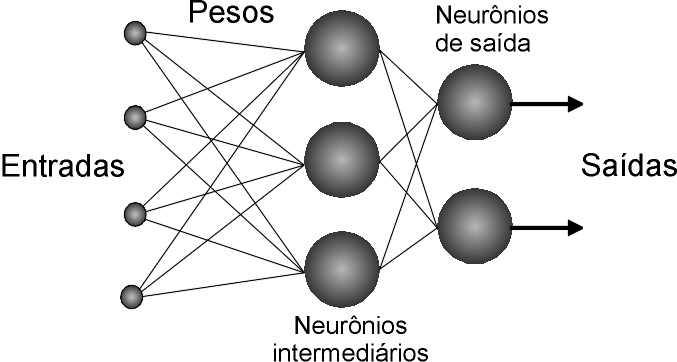

## **Funções de Ativação**

Funções de ativação introduzem não linearidade nas redes neurais, permitindo que elas aprendam relações complexas.

> Uma combinação linear em redes neurais se refere à operação feita por um neurônio antes da aplicação da função de ativação. É a soma ponderada dos *inputs* com os pesos, mais o *bias*. Essa operação, sozinha, é linear — ou seja, o neurônio, sem uma função de ativação não linear, só consegue modelar relações lineares entre entrada e saída.

Serão apresentadas a seguir as principais funções de ativação utilizadas em redes neurais, com foco em seus comportamentos e aplicações. Para facilitar a visualização dessas funções e evitar repetição de código, será construída uma função `plot_func`.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Função genérica para plotar funções de ativação
def plot_func(x, y, label, title, ylabel):
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label=label, linewidth=2)
    plt.xlabel('x')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

### **Sigmóide:**

É uma das funções de ativação mais clássicas. Ela transforma qualquer valor real em um intervalo entre $0$ e $1$, sendo definida pela fórmula:

$$
\sigma(x) = \frac{1}{1+e^{-x}}
$$

Essa característica a torna especialmente útil em tarefas de classificação binária, onde a saída pode ser interpretada como uma probabilidade. A seguir, é exibido o gráfico da função sigmoide.

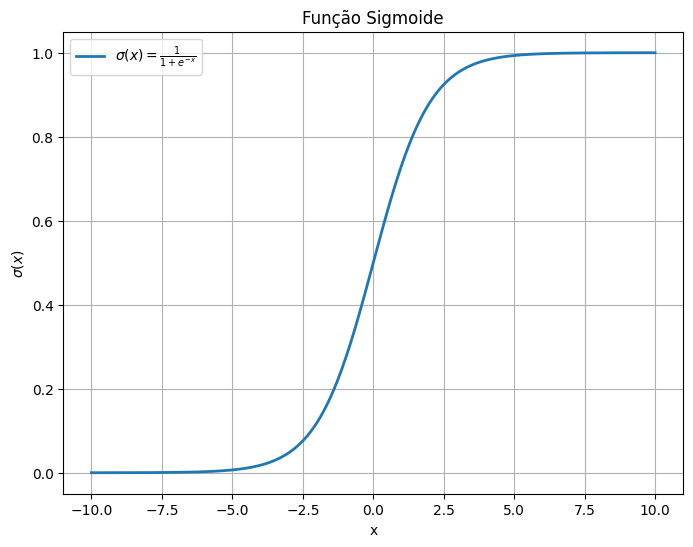

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 400)
y = sigmoid(x)

plot_func(x, y, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', 'Função Sigmoide', r'$\sigma(x)$')

### **Tangente Hiperbólica:**

Amplamente utilizada como função de ativação em redes neurais. Mapeia valores reais em um intervalo entre $-1$ e $1$, sendo definida por:

$$
\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

Essa simetria em torno da origem torna a `tanh` vantajosa em relação à sigmoide em alguns contextos, pois facilita a centralização dos dados e pode acelerar o processo de treinamento. A seguir, é exibido o gráfico da função tangente hiperbólica.

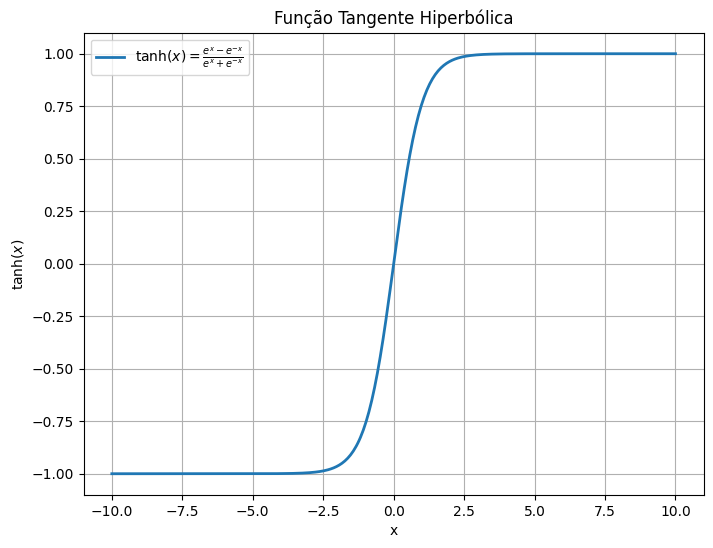

In [3]:
def tanh(x):
    return np.tanh(x)

x = np.linspace(-10, 10, 400)
y = tanh(x)

plot_func(x, y, r'$\tanh(x)=\frac{e^x - e^{-x}}{e^x + e^{-x}}$', 'Função Tangente Hiperbólica', r'$\tanh(x)$')

### **Rectified Linear Unit (ReLU):**

É uma das funções de ativação mais utilizadas em redes neurais modernas, especialmente em arquiteturas profundas. Definida como:

$$
ReLU = max(0,x)
$$

Retorna zero para valores negativos e mantém os positivos, introduzindo não linearidade de forma eficiente. Sua simplicidade e baixo custo computacional a tornaram padrão em muitas aplicações. A seguir, é exibido o gráfico da função ReLU:

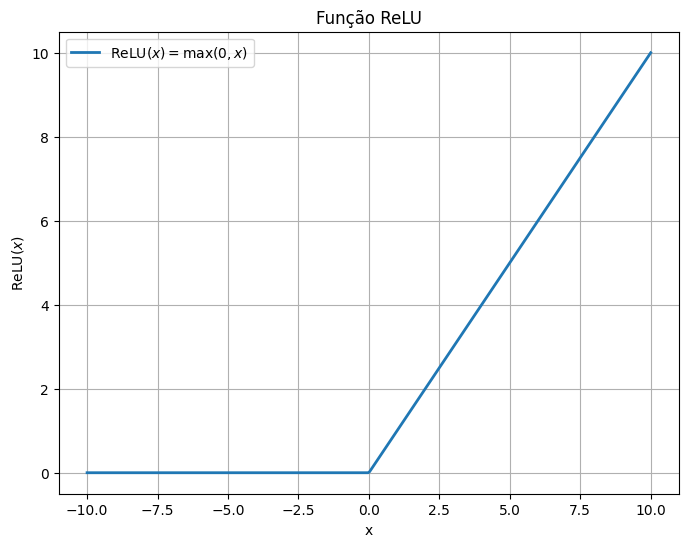

In [4]:
def relu(x):
    return np.maximum(0, x)

x = np.linspace(-10, 10, 400)
y = relu(x)

plot_func(x, y, r'$\text{ReLU}(x)=\max(0, x)$', 'Função ReLU', r'$\text{ReLU}(x)$')

### **Softmax:**



É geralmente utilizada em tarefas de classificação multiclasse. Ela transforma um vetor de valores reais em uma distribuição de probabilidades, onde cada valor está entre 0 e 1 e a soma de todos é igual a 1. A fórmula é dada por:

$$
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}
$$

Particularmente usada na camada de saída de redes neurais classificadoras com múltiplas classes, permitindo interpretar os resultados como probabilidades associadas a cada classe. A seguir, é exibido o gráfico da função aplicada a um vetor de entrada com três elementos.

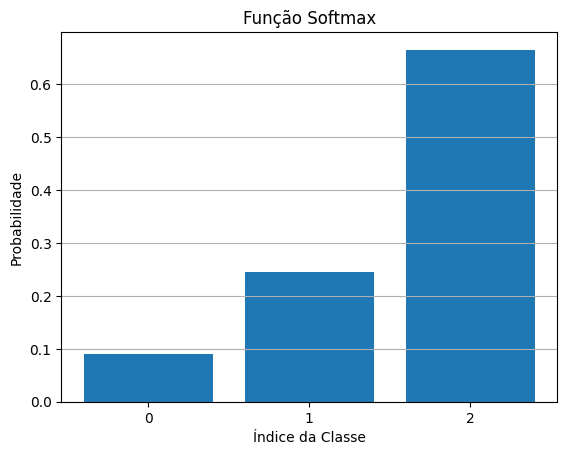

In [5]:
def softmax(x):
    e_x = np.exp(x - np.max(x))  # estabilidade numérica
    return e_x / e_x.sum()

x = np.array([1.0, 2.0, 3.0])
y = softmax(x)

plt.bar(range(len(y)), y)
plt.title('Função Softmax')
plt.xlabel('Índice da Classe')
plt.ylabel('Probabilidade')
plt.xticks(range(len(y)))
plt.grid(True, axis='y')
plt.show()

## **Implementação e Visualização de uma Rede Neural MLP**



### **1. Definição da Arquitetura da Rede**

Vamos construir uma rede neural do tipo MLP com finalidade estritamente didática, a fim de compreender sua estrutura básica e seu funcionamento. Para isso, utilizaremos a função sigmoide como ativação nas camadas e adotaremos as seguintes configurações:










In [6]:
input_dim = 3    # Número de neurônios na camada de entrada
hidden_dim = 2   # Número de neurônios na camada oculta
output_dim = 1   # Número de neurônios na camada de saída

Essa arquitetura é simples o suficiente para ser compreendida passo a passo, mas ainda assim ilustra conceitos fundamentais como:

- Propagação direta (*forward* pass)
- Aplicação de funções de ativação
- Ajuste de pesos (com *backpropagation*)

### **2. Inicialização de Pesos e Bias**



Para garantir reprodutibilidade dos resultados, utilizamos um valor fixo na semente do gerador de números aleatórios:

In [7]:
np.random.seed(42)  # Garante reprodutibilidade ao fixar a semente do gerador aleatório.

> O número $42$ em np.random.seed(42) é tecnicamente arbitrário, mas tornou-se popular entre programadores por ser uma referência ao livro O Guia do Mochileiro das Galáxias, onde 42 é a “resposta para a vida, o universo e tudo mais”.

Em seguida, realizamos a inicialização aleatória dos pesos e dos biases, que são os parâmetros aprendidos pela rede durante o treinamento:

In [8]:
W1 = np.random.randn(input_dim, hidden_dim)  # Pesos da entrada para a camada oculta
b1 = np.random.randn(hidden_dim)             # Bias da camada oculta
W2 = np.random.randn(hidden_dim, output_dim) # Pesos da camada oculta para a saída
b2 = np.random.randn(output_dim)             # Bias da camada de saída

> Esses parâmetros são sorteados de forma aleatória, seguindo uma distribuição normal padrão — uma forma comum de distribuir números em torno de um centro. Nesse caso, o centro é o número zero (ou seja, a média é zero), e a maior parte dos valores estará próxima dele, com alguns mais distantes, positivos ou negativos. Isso garante que os parâmetros comecem equilibrados, sem favorecer um lado específico, o que ajuda a rede a aprender de forma mais estável e eficiente.






















### **3. Visualização da Estrutura da Rede**

A visualização a seguir representa a MLP como um grafo, com neurônios como nós e conexões como arestas direcionadas. Pesos e bias são indicados nos rótulos, facilitando a interpretação da estrutura e dos parâmetros iniciais da rede.

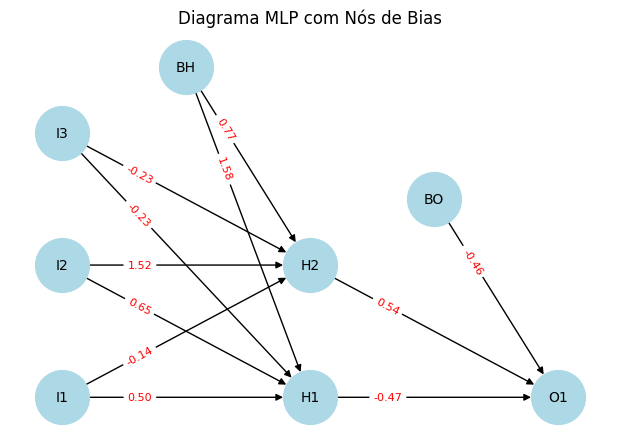

In [9]:
import networkx as nx

# Criação do grafo
G = nx.DiGraph()

# Nome dos neurônios (incluindo bias)
input_nodes = [f'I{i+1}' for i in range(input_dim)]
hidden_nodes = [f'H{i+1}' for i in range(hidden_dim)]
output_nodes = [f'O{i+1}' for i in range(output_dim)]
bias_hidden_nodes = ['BH']  # Bias para a camada oculta
bias_output_nodes = ['BO']  # Bias para a camada de saída

# Adiciona todos os nós
G.add_nodes_from(input_nodes)
G.add_nodes_from(hidden_nodes)
G.add_nodes_from(output_nodes)
G.add_nodes_from(bias_hidden_nodes)
G.add_nodes_from(bias_output_nodes)

# Dicionário para rótulos das arestas
edge_labels = {}

# Conexões da entrada para a camada oculta
for i, inp in enumerate(input_nodes):
    for j, hid in enumerate(hidden_nodes):
        G.add_edge(inp, hid)
        edge_labels[(inp, hid)] = f'{W1[i, j]:.2f}'

# Conexões do bias da camada oculta
for j, hid in enumerate(hidden_nodes):
    G.add_edge(bias_hidden_nodes[0], hid)  # BH conecta a todos os neurônios ocultos
    edge_labels[(bias_hidden_nodes[0], hid)] = f'{b1[j]:.2f}' # Rótulo é o valor do bias

# Conexões da camada oculta para a saída
for j, hid in enumerate(hidden_nodes):
    for k, out in enumerate(output_nodes):
        G.add_edge(hid, out)
        edge_labels[(hid, out)] = f'{W2[j, k]:.2f}'

# Conexões do bias da camada de saída
for k, out in enumerate(output_nodes):
    G.add_edge(bias_output_nodes[0], out) # BO conecta a todos neurônios de saída
    edge_labels[(bias_output_nodes[0], out)] = f'{b2[k]:.2f}'

# Define posições
pos = {}
# Posição dos nós de entrada
for i, node in enumerate(input_nodes):
    pos[node] = (0, i * 2)  # Espaçamento maior para acomodar os bias
# Posição do bias da camada oculta
pos[bias_hidden_nodes[0]] = (0.5, (len(input_nodes) * 2) -1 )   # Centralizado e um pouco abaixo da camada de entrada.
# Posição dos nós ocultos
for i, node in enumerate(hidden_nodes):
    pos[node] = (1, i * 2)
#Posição do bias da camada de saída
pos[bias_output_nodes[0]] = (1.5, (len(hidden_nodes)*2) -1)  # Centralizado abaixo da camada oculta.
# Posição dos nós de saída
for i, node in enumerate(output_nodes):
    pos[node] = (2, i * 2)

# Desenha o grafo
plt.figure(figsize=(6, 4))
nx.draw(G, pos, with_labels=True, node_size=1500, node_color='lightblue', arrows=True, font_size=10)
nx.draw_networkx_edge_labels(G, pos, label_pos=0.3, edge_labels=edge_labels, font_color='red', font_size=8)  #label_pos = 0.5
plt.title('Diagrama MLP com Nós de Bias')
plt.axis('off')
plt.show()

## **Propagação**

Durante a fase de propagação (*forward pass*), os dados percorrem a rede em uma única direção — da camada de entrada até a camada de saída. Em cada etapa, os neurônios realizam uma combinação dos sinais recebidos, ponderados pelos pesos, e aplicam uma função de ativação que introduz não-linearidade ao modelo. Esse processo permite que a rede transforme os dados brutos em representações cada vez mais abstratas e informativas, tornando-os mais adequados para tarefas como classificação, regressão, entre outras.










### **1. Exemplo de Entrada**

Para simular a propagação de informações na MLP, será utilizada uma amostra de entrada representada pelo vetor x. Esse vetor contém três valores, correspondentes aos neurônios da camada de entrada:

In [10]:
x = np.array([[0.5, -1.2, 0.3]])

A variável `x` é um array NumPy com uma linha e três colunas (`shape (1, 3)`), representando um único exemplo de entrada com três características. Em cenários com múltiplos exemplos, o array `x` apresentaria mais linhas, cada uma correspondendo a uma amostra distinta a ser processada simultaneamente pela rede.

### **2. Propagação na Camada Oculta**

Nesta etapa, o vetor de entrada é processado pela primeira camada da rede, a camada oculta. O fluxo ocorre em duas fases: uma combinação linear seguida da aplicação de uma função de ativação.

- Calcula-se a ativação linear (`z₁`) por meio do produto entre os dados de entrada `x` e os pesos `W₁`, somado ao vetor de bias `b₁`.  
- Em seguida, aplica-se a função sigmoide, gerando a saída da camada oculta (`a₁`).

In [11]:
z1 = np.dot(x, W1) + b1   # Cálculo linear (pré-ativação)
a1 = sigmoid(z1)          # Ativação com sigmoide

#### **Dados:**

- $x$ é o vetor de entrada:
$$
x = \begin{bmatrix} 0.5 & -1.2 & 0.3 \end{bmatrix}
$$

- $W_1$ é a matriz de pesos:

$$
W_1 =
\begin{bmatrix}
0.49671415 & -0.1382643 \\
0.64768854 & 1.52302986 \\
-0.23415337 & -0.23413696\\
\end{bmatrix}
$$

- $b_1$ é o vetor de bias:

$$
b_1 = \begin{bmatrix} 1.57921282 & 0.76743473 \end{bmatrix}
$$

> **Nota:** Em $W_1$, cada coluna corresponde a um neurônio da camada oculta — a primeira coluna é do primeiro neurônio. Em $b_1$, cada elemento é o bias de um neurônio, sendo o primeiro valor referente ao primeiro neurônio.

#### **Cálculo da Ativação Linear:**

1. Para o primeiro neurônio:

$$
z_1^{(1)} = 0.5 \times 0.49671415 + (-1.2) \times 0.64768854 + 0.3 \times (-0.23415337) + 1.57921282
$$

$$
= 0.248357075 - 0.777226248 - 0.070246011 + 1.57921282
$$

$$
\approx 0.9801
$$

2. Para o segundo neurônio:

$$
z_1^{(2)} = 0.5 \times (-0.1382643) + (-1.2) \times 1.52302986 + 0.3 \times (-0.23413696) + 0.76743473
$$

$$
= -0.06913215 - 1.827635832 - 0.070241088 + 0.76743473
$$

$$
\approx -1.1996
$$

Resultado da propagação na camada oculta:

$$
z_1 \approx \begin{bmatrix} 0.9801 & -1.1996 \end{bmatrix}
$$

A seguir, é exibido o resultado da ativação linear da primeira camada, calculado por meio da operação: `z1 = np.dot(x, W1) + b1`.

In [12]:
z1

array([[ 0.98009763, -1.19957434]])

#### **Aplicação da Função de Ativação:**


Após calcular $z_1$, aplicamos a função sigmoide para obter $a_1$:

$$
a_1 = σ(z_1) = [σ(0.9801), σ(-1.1996)] = [0.72712759, 0.23155095]
$$

A seguir, é exibido o resultado da aplicação da função de ativação na primeira camada, calculado por meio da operação: `a1 = sigmoid(z1)`.

In [13]:
a1

array([[0.72712759, 0.23155095]])

### **3. Propagação na Camada de Saída**

Nesta etapa, as ativações da camada oculta passam a servir como entrada para a camada de saída. O processamento também ocorre em duas fases: uma operação linear seguida pela aplicação de uma função de ativação.

- Calcula-se a ativação linear (`z₂`) por meio do produto entre `a₁` (saída da camada oculta) e os pesos `W₂`, somado ao vetor de bias `b₂`.  
- Em seguida, aplica-se a função de ativação sigmoide para obter a saída final da rede (`ŷ`).

In [14]:
z2 = np.dot(a1, W2) + b2    # Cálculo linear (pré-ativação)
a2 = sigmoid(z2)            # Ativação com sigmoid

#### **Dados:**

- $a_1 = [0.72712759, 0.23155095]$

- $W_2 =
\begin{bmatrix}
-0.46947439 \\
0.54256004
\end{bmatrix}$

- $b_2=-0.46341769$

#### **Cálculo da Ativação Linear:**

$$
z_2 = (0.72712759 \times -0.46947439) + (0.23155095 \times 0.54256004) + (-0.46341769)
$$

$$
= \approx -0.341001 + 0.125691 - 0.46341769
$$

$$
\approx -0.67872869
$$

A seguir, é exibido o resultado da ativação linear da segunda camada, calculado por meio da operação: `z2 = np.dot(a1, W2) + b2`.

In [15]:
z2

array([[-0.67915518]])

#### **Aplicação da Função de Ativação**

Após calcular $z_2$, aplicamos a função sigmoide para obter $a_2$:

$$
a_2 = σ(z_2) = [σ(-0.67872869)] \approx [0.3364]
$$

A seguir, é exibido o resultado da aplicação da função de ativação na segunda camada, calculado por meio da operação: `a2 = sigmoid(z2)`.

In [16]:
a2

array([[0.33644988]])

## **Retropropagação**

Agora que concluímos a fase de propagação direta (*forward pass*) e obtivemos as ativações ao longo das camadas, avançamos para a etapa de retropropagação (*backward pass*). Essa fase é responsável pelo ajuste dos pesos e dos *bias* da rede, com base na diferença entre a saída estimada ($\hat{y}$ ou $a₂$) e o valor alvo ($y$). O objetivo é minimizar a função de custo por meio do algoritmo de gradiente descendente.

> **Nota:** O gradiente descendente é um algoritmo de otimização utilizado para minimizar funções de custo. Ele atualiza iterativamente os parâmetros da rede (pesos e *bias*) na direção oposta ao gradiente da função de custo em relação a esses parâmetros. Isso porque o gradiente aponta para a direção de maior crescimento da função — ao seguir o sentido contrário, a rede se move em direção ao mínimo, reduzindo o erro da predição.

### **1. Definição da Função de Custo**

Como exemplo didático, utilizaremos a função de custo Erro Quadrático Médio (MSE — [Mean Squared Error](https://pt.wikipedia.org/wiki/Erro_quadr%C3%A1tico_m%C3%A9dio)), amplamente utilizada em problemas de regressão. Sua formulação geral para $N$ amostras é:

$$
C = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$$

No entanto, para fins didáticos, podemos focar em uma única amostra, onde a fórmula se reduz a:

$$
C = (y - \hat{y})^2
$$

onde:
- $y$ é o valor alvo (verdadeiro),
- $\hat{y}$ é a previsão da rede.

Suponhamos que o valor para $x = [0.5, -1.2, 0.3]$ seja $y=0.8$. Com base na propagação, obtivemos $\hat{y} \approx 0.3364$. Assim, o custo é:

$$
C = (0.8 - 0.3364)^2 = (0.4636)^2 \approx 0.2149
$$

O objetivo é diminuir esse erro ajustando os pesos e os *biases*. Abaixo está a implementação correspondente para calcular o custo:

In [17]:
# Valores fornecidos
y = 0.8            # Saída esperada (target)
y_pred = a2        # Saída da rede (predição)

# Cálculo do erro: diferença entre saída esperada e predita
erro = y - y_pred

# Cálculo da função de custo MSE para um único exemplo
C = erro**2  # MSE = (erro)^2

# Exibindo os resultados
print(f"Erro: {erro.item():.4f}")
print(f"Custo (MSE): {C.item():.4f}")


Erro: 0.4636
Custo (MSE): 0.2149


### **2. Cálculo dos Gradientes**

Na retropropagação, os [gradientes](https://pt.wikipedia.org/wiki/Gradiente) são calculados usando a [regra da cadeia](https://pt.wikipedia.org/wiki/Regra_da_cadeia), propagando o erro da camada de saída de volta até a camada de entrada. Vamos calcular os gradientes para os pesos ($W_2, W_1$) e *biases* ($b_2, b_1$) em cada camada.

> **Nota:** O gradiente indica a taxa de variação do erro em relação a cada peso. Um valor elevado de gradiente significa que pequenas alterações nesse peso provocam grandes mudanças no erro. Por isso, os pesos são atualizados na direção oposta ao gradiente — reduzindo o valor do erro —, o que dá origem ao nome "descida do gradiente".

#### **Gradiente na Camada de Saída**

O primeiro passo é calcular o gradiente do erro em relação à saída da rede — mais especificamente, em relação à ativação linear da camada de saída ($z_2$). Esse gradiente, $𝛿_2$, expressa o quanto a função de custo varia em resposta a pequenas mudanças em $z_2$, sendo essencial para o ajuste dos pesos e *bias* dessa camada. Esse cálculo é feito aplicando a regra da cadeia, combinando duas derivadas parciais:

$$
\delta_2 = \frac{\partial C}{\partial z_2} = \frac{\partial C}{\partial a_2} \cdot \frac{\partial a_2}{\partial z_2}
$$

Especificamente:

- $\frac{\partial C}{\partial a_2}$ mede quanto o erro muda em relação à saída prevista (ativação).
- $\frac{\partial a_2}{\partial z_2}$ mede como a ativação muda em relação à entrada linear antes da função de ativação.

Multiplicando esses dois termos, obtemos o gradiente total $\frac{\partial C}{\partial z_2}$, que informa como $z_2$ ​ afeta diretamente o custo.

##### **Derivada do custo em relação à saída $\frac{\partial C}{\partial a_2}$**

Para isso, aplicamos a derivada da função em relação a $a_2$:

$$
\frac{\partial C}{\partial a_2} = \frac{\partial}{\partial a_2} \left[ \frac{1}{2}(y - a_2)^2 \right]
$$

Utilizando a **regra da potência** e a derivada da composição:

$$
\frac{1}{2} \cdot 2(y - a_2) \cdot (-1) = -(y - a_2)
$$

Portanto:
$$
\frac{\partial C}{\partial a_2} = -(y - a_2)
$$

Esse resultado mostra que, se a saída da rede $a_2$ estiver abaixo do valor real $y$, o gradiente será positivo, e vice-versa. Essa informação será usada para ajustar os pesos da rede na direção correta, durante a retropropagação.

Substituindo os valores: $y=0.8$ e $a_2 = 0.3364$, temos:
$$
\frac{\partial C}{\partial a_2} = - (0.8 - 0.3364) = -0.4636
$$

Abaixo está a implementação correspondente:

In [18]:
# Gradiente do custo em relação à saída da rede (a2)
grad = -(y - a2)  # ∂C/∂a₂ = -(y - a₂), derivada da função de custo MSE

# Exibição do resultado
print(f"Gradiente ∂C/∂a₂: {grad.item():.4f}")

Gradiente ∂C/∂a₂: -0.4636


##### **Derivada da função sigmoide $\frac{\partial a_2}{\partial z_2}$**

A função sigmoide é dada por:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

E sua derivada é:

$$
\frac{\partial \sigma}{\partial z} = \sigma(z) \cdot (1 - \sigma(z))
$$

Para $z_2 \approx -0.6787$, temos:

$$
a_2 = \sigma(z_2) \approx 0.3364
$$

Então, a derivada da ativação em relação a $z_2$ é:

$$
\frac{\partial a_2}{\partial z_2} = 0.3364 \cdot (1 - 0.3364) = 0.3364 \cdot 0.6636 \approx 0.2232
$$

Abaixo está a implementação correspondente:

In [19]:
# Derivada da função sigmoide a partir da sua saída
def sigmoid_deriv(a):
    """Retorna a derivada da função sigmoide em função de sua saída."""
    return a * (1 - a)

# Cálculo da derivada da ativação
da2_dz2 = sigmoid_deriv(a2)

# Exibição dos valores
print(f"a₂ = σ(z₂) = {a2.item():.4f}")
print(f"∂a₂/∂z₂ = a₂ · (1 - a₂) = {a2.item():.4f} · (1 - {a2.item():.4f}) = {da2_dz2.item():.4f}")

a₂ = σ(z₂) = 0.3364
∂a₂/∂z₂ = a₂ · (1 - a₂) = 0.3364 · (1 - 0.3364) = 0.2233


##### **Cálculo de $\delta_2$**

O erro da camada de saída é dado por:

$$
\delta_2 = \frac{\partial C}{\partial a_2} \cdot \frac{\partial a_2}{\partial z_2}
$$

Substituindo os valores já calculados:

$$
\delta_2 = (-0.4636) \cdot (0.2232) \approx -0.1035
$$

Abaixo está a implementação correspondente:

In [20]:
# Erro da camada de saída
delta2 = grad * da2_dz2

# Exibindo o resultado
print(f"δ2 = ∂C/∂a2 · ∂a2/∂z2 = {grad.item():.4f} * {da2_dz2.item():.4f} = {delta2.item():.4f}")

δ2 = ∂C/∂a2 · ∂a2/∂z2 = -0.4636 * 0.2233 = -0.1035


Agora, usamos $\delta_2$ para calcular os gradientes dos pesos e *bias* da camada de saída.

##### **Gradiente de $W_2$**

A derivada do custo em relação aos pesos da camada de saída é dada por:

$$
\frac{\partial C}{\partial W_2} = a_1^\top \cdot \delta_2
$$

Onde $a_1 = \begin{bmatrix} 0.72712759 & 0.23155095 \end{bmatrix}$ é a saída da camada oculta. Como $a_1$ é um vetor linha e $\delta_2$ é um escalar (neste caso, temos uma única saída), o resultado da multiplicação é um vetor:

$$
\frac{\partial C}{\partial W_2} =
\begin{bmatrix}
0.72712759 \\
0.23155095
\end{bmatrix}
\cdot (-0.1035)
\approx
\begin{bmatrix}
-0.0753 \\
-0.0240
\end{bmatrix}
$$

Abaixo está a implementação correspondente:

In [21]:
# Gradiente da função de custo em relação aos pesos da camada de saída
dC_dW2 = a1.T * delta2  # Produto entre a transposta de a1 (2×1) e δ₂ (escalar) → resultado (2×1)

# Exibindo o resultado
print("∂C/∂W₂ = a1ᵀ · δ₂ =")
print(dC_dW2)


∂C/∂W₂ = a1ᵀ · δ₂ =
[[-0.07524912]
 [-0.02396279]]


##### **Gradiente de $b_2$**

$$
\frac{\partial C}{\partial b_2} = \delta_2 \approx -0.1035
$$

Abaixo está a implementação correspondente:

In [22]:
# Gradiente do custo em relação ao bias da camada de saída
db2 = delta2  # Como δ₂ é escalar, sua derivada em relação ao bias também é escalar

# Exibindo o resultado
print(f"∂C/∂b₂ = δ₂ ≈ {db2.item():.4f}")

∂C/∂b₂ = δ₂ ≈ -0.1035


#### **Gradiente na Camada Oculta**

Agora, propagamos o erro para a camada oculta, calculando $\delta_1$:

$$
\delta_1 = (\delta_2 \cdot W_2^\top) \cdot \frac{\partial a_1}{\partial z_1}
$$



##### **Propagação do erro ($\delta_2 \cdot W_2^\top$)**

Se $W_2 = \begin{bmatrix} -0.46947439 \\ 0.54256004 \end{bmatrix}$, então sua transposta é:

$$
W_2^\top = \begin{bmatrix} -0.46947439 & 0.54256004 \end{bmatrix}
$$

Multiplicamos por $\delta_2 \approx -0.1035$:

$$
\delta_2 \cdot W_2^\top = -0.1035 \cdot \begin{bmatrix} -0.46947439 & 0.54256004 \end{bmatrix} \approx \begin{bmatrix} 0.0486 & -0.0562 \end{bmatrix}
$$

Abaixo está a implementação correspondente:

In [23]:
# Transposta de W2 (1x2)
W2_T = W2.T  # Agora W2_T é 1x2

# Multiplicação escalar com vetor linha
delta_hidden_input = delta2 * W2_T

# Exibindo o resultado
print("W2^T:", W2_T)
print("δ2 ⋅ W2^T:", delta_hidden_input)

W2^T: [[-0.46947439  0.54256004]]
δ2 ⋅ W2^T: [[ 0.04858506 -0.05614856]]


##### **Derivada da função sigmoide na camada oculta**  $\left( \frac{\partial a_1}{\partial z_1} \right)$

Para $a_1 = \begin{bmatrix} 0.72712759 & 0.23155095 \end{bmatrix}$, temos:

$$
\frac{\partial a_1}{\partial z_1} =
\begin{bmatrix}
0.72712759 \cdot (1 - 0.72712759) &
0.23155095 \cdot (1 - 0.23155095)
\end{bmatrix}
\approx
\begin{bmatrix}
0.1985 &
0.1779
\end{bmatrix}
$$

Abaixo está a implementação correspondente:

In [24]:
# Derivada da sigmoide: a * (1 - a)
da1_dz1 = a1 * (1 - a1)

# Exibindo o resultado
print(da1_dz1)

[[0.19841306 0.17793511]]


##### **Cálculo de $\delta_1$**

$$
\delta_1 =
\begin{bmatrix}
0.0486 \cdot 0.1985 &
-0.0562 \cdot 0.1779
\end{bmatrix}
\approx
\begin{bmatrix}
0.0096 &
-0.0100
\end{bmatrix}
$$

Abaixo está a implementação correspondente:

In [25]:
# Erro da camada escondida
delta1 = delta_hidden_input * da1_dz1

# Exibindo o resultado
print(f"δ1 = (δ2 · W2ᵀ) * ∂a1/∂z1 = {delta_hidden_input} * {da1_dz1} = {delta1}")

δ1 = (δ2 · W2ᵀ) * ∂a1/∂z1 = [[ 0.04858506 -0.05614856]] * [[0.19841306 0.17793511]] = [[ 0.00963991 -0.0099908 ]]


##### **Gradiente de $W_1$**

O gradiente em relação aos pesos da primeira camada é:

$$
\frac{\partial C}{\partial W_1} = x^\top \cdot \delta_1 =
\begin{bmatrix}
0.5 \\
-1.2 \\
0.3
\end{bmatrix}
\cdot
\begin{bmatrix}
0.0096 & -0.0100
\end{bmatrix}
\approx
\begin{bmatrix}
0.0048 & -0.0050 \\
-0.0115 & 0.0120 \\
0.0029 & -0.0030
\end{bmatrix}
$$

Abaixo está a implementação correspondente:

In [26]:
# Cálculo do gradiente: ∂C/∂W1 = x^T ⋅ δ1
grad_W1 = np.dot(x.T, delta1)

# Exibindo o resultado
print("Gradiente ∂C/∂W1:")
print(grad_W1)

Gradiente ∂C/∂W1:
[[ 0.00481995 -0.0049954 ]
 [-0.01156789  0.01198896]
 [ 0.00289197 -0.00299724]]


##### **Gradiente de $b_1$**

O gradiente em relação ao vetor de bias da primeira camada é dado por:

$$
\frac{\partial C}{\partial b_1} = \delta_1 \approx \begin{bmatrix} 0.0096 & -0.0100 \end{bmatrix}
$$

Abaixo está a implementação correspondente:

In [27]:
# Derivada do custo em relação ao bias da camada oculta
db1 = delta1

# Exibindo o resultado
print(f"∂C/∂b1 = δ1 ≈ {db1}")

∂C/∂b1 = δ1 ≈ [[ 0.00963991 -0.0099908 ]]


### **3. Atualização dos Parâmetros**

Com os gradientes calculados, atualizamos os pesos e biases usando a taxa de aprendizado $\eta$. Suponha $\eta = 0.1$:

$$
W_2 = W_2 - \eta \cdot \frac{\partial C}{\partial W_2}
\approx
\begin{bmatrix}
-0.4695 \\
0.5426
\end{bmatrix}
- 0.1 \cdot
\begin{bmatrix}
-0.0753 \\
-0.0240
\end{bmatrix}
\approx
\begin{bmatrix}
-0.4619 \\
0.5450
\end{bmatrix}
$$

$$
b_2 = b_2 - \eta \cdot \frac{\partial C}{\partial b_2}
\approx
-0.4634 - 0.1 \cdot (-0.1035)
\approx
-0.4531
$$

$$
W_1 = W_1 - \eta \cdot \frac{\partial C}{\partial W_1}
\approx
\begin{bmatrix}
0.4967 & -0.1383 \\
0.6477 & 1.5230 \\
-0.2342 & -0.2341
\end{bmatrix}
- 0.1 \cdot
\begin{bmatrix}
0.0048 & -0.0050 \\
-0.0115 & 0.0120 \\
0.0029 & -0.0030
\end{bmatrix}
\approx
\begin{bmatrix}
0.4962 & -0.1378 \\
0.6488 & 1.5218 \\
-0.2344 & -0.2338
\end{bmatrix}
$$

$$
b_1 = b_1 - \eta \cdot \frac{\partial C}{\partial b_1}
\approx
\begin{bmatrix} 1.5792 & 0.7674 \end{bmatrix} - 0.1 \cdot \begin{bmatrix} 0.0096 & -0.0100 \end{bmatrix}
\approx
\begin{bmatrix} 1.5782 & 0.7684 \end{bmatrix}
$$

Esse processo é repetido por várias iterações até que o erro convirja. Abaixo está a implementação correspondente:

In [28]:
# Taxa de aprendizado
learning_rate = 0.1

# Atualizações
W2 = W2 - learning_rate * dC_dW2
b2 = b2 - learning_rate * db2
W1 = W1 - learning_rate * grad_W1
b1 = b1 - learning_rate * db1

# Impressão dos resultados com 4 casas decimais
print("W2 atualizado:\n", W2)
print("\nb2 atualizado:\n", b2)
print("\nW1 atualizado:\n", W1)
print("\nb1 atualizado:\n", b1)

W2 atualizado:
 [[-0.46194947]
 [ 0.54495632]]

b2 atualizado:
 [[-0.45306887]]

W1 atualizado:
 [[ 0.49623216 -0.13776476]
 [ 0.64884533  1.52183096]
 [-0.23444257 -0.23383723]]

b1 atualizado:
 [[1.57824882 0.76843381]]


## **Implementação com Scikit-Learn, TensorFlow/Keras e PyTorch**


Bibliotecas como [Scikit-Learn](https://scikit-learn.org/stable/), [TensorFlow](https://www.tensorflow.org/?hl=pt-br)/[Keras](https://keras.io/) e [PyTorch](https://pytorch.org/) fornecem implementações otimizadas para treinamento de modelos, com suporte completo a retropropagação, autograd e atualização de parâmetros. Essas ferramentas abstraem os detalhes matemáticos de baixo nível, permitindo maior foco na estruturação e validação dos modelos.

| **Característica**           | **Scikit-Learn**                                              | **TensorFlow / Keras**                                             | **PyTorch**                                                      |
|------------------------------|---------------------------------------------------------------|--------------------------------------------------------------------|------------------------------------------------------------------|
| **Foco Principal**           | *Machine learning* tradicional e algoritmos clássicos           | *Deep learning* e computação numérica                                | *Deep learning* com ênfase em pesquisa e prototipagem dinâmica       |
| **Nível de Abstração**       | Alto – interface simples e intuitiva                          | Médio/Alto – API de alto nível (Keras) simplifica a criação         | Médio – abordagem define-by-run que permite maior flexibilidade    |
| **Facilidade de Uso**        | Muito fácil – ideal para iniciantes e protótipos rápidos       | Fácil (com Keras), mas pode ser mais complexo em projetos avançados   | Requer mais conhecimento técnico, mas oferece maior controle       |
| **Desempenho**               | Eficiente para problemas de pequena e média escala             | Altamente otimizado para modelos complexos com suporte a GPU         | Excelente desempenho, especialmente em experimentos e pesquisas     |
| **Suporte a GPUs**           | Limitado – não é o foco principal                              | Robusto – integração nativa com GPUs via TensorFlow                   | Nativo – excelente integração com GPUs para treinamento acelerado    |
| **Comunidade e Ecossistema** | Ampla e consolidada com muitas integrações em Python             | Grande, com vasta documentação, ferramentas e bibliotecas associadas | Crescente, especialmente em comunidades acadêmicas e de pesquisa       |


### **Scikit-Learn**

Scikit-learn é uma biblioteca de *Machine Learning* em *Python*, conhecida pela sua simplicidade e eficiência. Ela oferece diversas ferramentas para análise de dados e modelos preditivos, incluindo algoritmos para redes neurais.

#### **1. Importação das Bibliotecas**

In [29]:
from sklearn.neural_network import MLPClassifier

Esse comando importa o [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) do módulo sklearn.neural_network. Ele é um classificador baseado em rede neural *feedforward*, treinado por meio de descida do gradiente estocástica com retropropagação (*backpropagation*). É usado para tarefas de classificação supervisionada, com suporte a múltiplas camadas ocultas, funções de ativação e regularização.

In [30]:
from sklearn.datasets import make_classification

Esse comando importa a função [make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) do módulo sklearn.datasets. Essa função gera um conjunto de dados sintético para tarefas de classificação, útil para testes e demonstrações. Permite controlar o número de amostras, atributos, classes, ruído, entre outros parâmetros, facilitando a simulação de cenários diversos.

#### **2. Geração e Divisão dos Dados**

In [31]:
# Gerando dados: 100 amostras, 4 features, 3 classes
X, y = make_classification(n_samples=100,
                           n_features=4,
                           n_informative=3,
                           n_redundant=0,
                           n_classes=3,
                           random_state=42)

O código usa `make_classification` para gerar $100$ amostras com $4$ atributos, sendo $3$ informativos e nenhum redundante, distribuídas em $3$ classes. O parâmetro `random_state=42` garante reprodutibilidade. $X$ contém os dados e $y$, os rótulos. Os valores gerados são visualizados a seguir por meio de gráficos de dispersão para todas as combinações possíveis de duas em duas features.

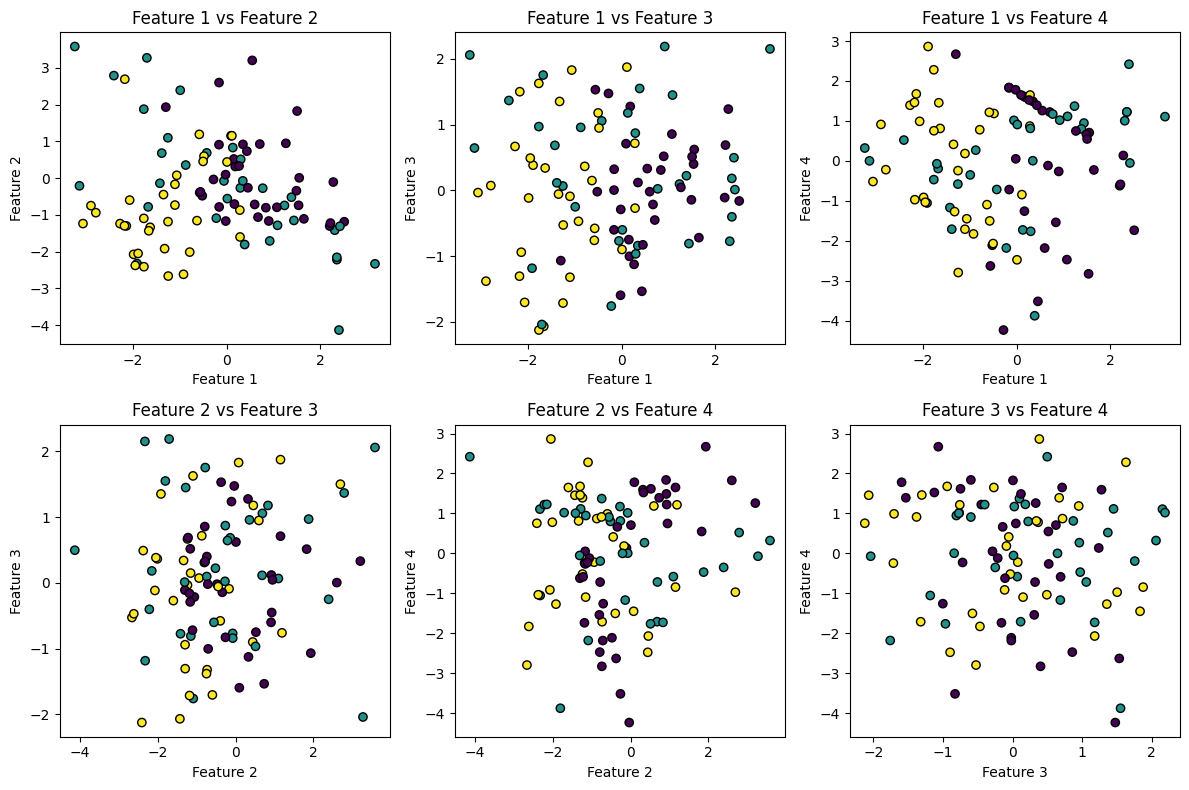

In [32]:
from itertools import combinations

# Nomes fictícios para as features (opcional)
feature_names = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4']

# Gerando todas as combinações possíveis de pares de features
pairs = list(combinations(range(X.shape[1]), 2))

# Criando os subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for i, (f1, f2) in enumerate(pairs):
    ax = axes[i]
    scatter = ax.scatter(X[:, f1], X[:, f2], c=y, cmap='viridis', edgecolor='k')
    ax.set_xlabel(feature_names[f1])
    ax.set_ylabel(feature_names[f2])
    ax.set_title(f'{feature_names[f1]} vs {feature_names[f2]}')

plt.tight_layout()
plt.show()

#### **3. Definição e Treinamento do Modelo MLP**

In [33]:
# Definindo o modelo MLP com uma camada oculta de 10 neurônios
mlp = MLPClassifier(hidden_layer_sizes=(10,),
                    activation='relu',
                    solver='adam',
                    max_iter=5000)

# Treinando o modelo
mlp.fit(X, y)

MLPClassifier(hidden_layer_sizes=(10,), max_iter=5000)

O código define um modelo MLP com uma camada oculta de $10$ neurônios, usando **ReLU** como ativação e o otimizador Adam. O treinamento é limitado a $5000$ iterações. O método `fit(X, y)` treina o modelo com os dados gerados.

> O parâmetro `solver` no `MLPClassifier` define o algoritmo usado para otimizar os pesos da rede neural durante o treinamento. No caso do código acima, o valor `solver='adam'` especifica que o Adam (Adaptive Moment Estimation) será utilizado.

#### **4. Realizando Predições**

In [34]:
# Fazendo previsões com o modelo treinado
predicoes = mlp.predict(X)

# Exibindo as primeiras 10 previsões e os rótulos reais
for i in range(10):
    print(f"Previsão: {predicoes[i]}, Real: {y[i]}")

Previsão: 1, Real: 1
Previsão: 2, Real: 2
Previsão: 1, Real: 1
Previsão: 2, Real: 2
Previsão: 2, Real: 2
Previsão: 2, Real: 2
Previsão: 1, Real: 1
Previsão: 0, Real: 0
Previsão: 1, Real: 2
Previsão: 0, Real: 0


O código acima utiliza o método `predict` para fazer previsões sobre os dados de entrada $X$. Em seguida, ele compara as $10$ primeiras previsões com os rótulos reais contidos em `y`, permitindo verificar a precisão das previsões feitas pelo modelo. Para cada amostra, a previsão do modelo e o valor real são exibidos lado a lado.

### **TensorFlow / Keras**

TensorFlow é uma biblioteca desenvolvida pelo Google para computação numérica e *Machine Learning*, utilizada para construir e treinar modelos de *Deep Learning*. Keras é uma API que roda sobre o *TensorFlow* (entre outras plataformas) e simplifica a criação, o treinamento e a experimentação com redes neurais, permitindo a implementação rápida de modelos de forma intuitiva e com poucas linhas de código.

#### **1. Importação das Bibliotecas**

In [35]:
import tensorflow as tf

O TensorFlow (tf) é uma biblioteca que facilita a criação, treinamento e implantação de modelos de *Machine Learning* e *Deep Learning*.

In [36]:
from tensorflow.keras import Input, Sequential
from tensorflow.keras.layers import Dense

 A API TensorFlow Keras oferece uma interface de alto nível, simplificando a construção e treinamento de redes neurais:
 - `Input`: define explicitamente a forma dos dados de entrada para o modelo.
 - `Sequential`: modelo linear com camadas empilhadas, onde a saída de uma camada é a entrada da próxima.
 - `Dense`: camada totalmente conectada (feedforward), onde cada neurônio recebe entradas de todos os neurônios da camada anterior.



















#### **2. Geração de Dados Aleatórios**

Vamos utilizar os mesmos dados gerados anteriormente com a função `make_classification`, que consistem em $100$ amostras, $4$ atributos e $3$ classes. Esses dados serão empregados para treinar e testar o modelo de aprendizado de máquina que iremos desenvolver.

#### **3. Definição do Modelo MLP**

In [37]:
model = Sequential([
    Input(shape=(4,)),                         # camada de entrada
    Dense(10, activation='relu'),              # camada oculta com 10 neurônios
    Dense(3, activation='softmax')             # camada de saída para 3 classes
])

O código define um modelo de rede neural sequencial utilizando a API Keras do TensorFlow.

- `Input(shape=(4,))`: define a camada de entrada do modelo, especificando que o modelo receberá dados com $4$ características.

- `Dense(10, activation='relu')`: adiciona uma camada oculta composta por $10$ neurônios ativados pela função **ReLU**.

- `Dense(3, activation='softmax')`: adiciona uma camada de saída com $3$ neurônios ativados pela função **Softmax**.

#### **4. Compilação do Modelo**

In [38]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

- `optimizer='adam'`: Algoritmo de otimização que ajusta os pesos do modelo de forma eficiente.

- `loss='sparse_categorical_crossentropy'`: Função de perda adequada para classificação multi-classe quando os rótulos são inteiros.

- `metrics=['accuracy']`: Durante o treinamento, a acurácia será calculada para avaliar a performance do modelo.

#### **5. Visualização do Resumo do Modelo**

In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83 (332.00 B)

 Trainable params: 83 (332.00 B)

 Non-trainable params: 0 (0.00 B)

Exibe um resumo do modelo, mostrando as camadas, o número de parâmetros e a forma das saídas em cada camada.

#### **6. Treinamento do Modelo**

In [40]:
model.fit(X, y, epochs=100, batch_size=8)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.3572 - loss: 1.3988
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4061 - loss: 1.2690
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3708 - loss: 1.2723
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3032 - loss: 1.3153
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3575 - loss: 1.3047  
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4088 - loss: 1.2103
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4688 - loss: 1.1241
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4857 - loss: 1.0566 
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3767 - loss: 1.2587 
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3843 - loss: 1.1185
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4738 - loss: 0.9966  
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/st

- `model.fit`: Função que inicia o treinamento do modelo.
 - `X`, `y`: Dados de entrada e rótulos.
 - `epochs=10`: Número de vezes que o modelo passará por todo o conjunto de dados.
 - `batch_size=8`: Número de amostras utilizadas para atualizar os pesos a cada iteração.

#### **7. Realizando Predições**

In [41]:
# Fazendo previsões com o modelo treinado
predicoes = model.predict(X)

# Exibindo as primeiras 10 previsões e os rótulos reais
for i in range(10):
    print(f"Previsão: {predicoes[i]}, Real: {y[i]}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Previsão: [0.37434894 0.44548827 0.18016288], Real: 1
Previsão: [0.01025149 0.11973803 0.87001044], Real: 2
Previsão: [0.01101255 0.7584288  0.23055865], Real: 1
Previsão: [0.267854   0.34288478 0.38926116], Real: 2
Previsão: [0.02001402 0.28682053 0.6931655 ], Real: 2
Previsão: [0.00422834 0.08748197 0.9082896 ], Real: 2
Previsão: [0.37461182 0.42016467 0.20522347], Real: 1
Previsão: [0.7250969  0.18379304 0.09111013], Real: 0
Previsão: [0.01076726 0.81404215 0.17519052], Real: 2
Previsão: [0.650234   0.2505958  0.09917026], Real: 0


Como a saída do modelo Keras é um vetor de probabilidades para cada classe, é necessário converter isso em uma previsão final de classe. Para isso, utilizamos a função `np.argmax(predicoes, axis=1)`, que retorna o índice da maior probabilidade em cada vetor — ou seja, a classe mais provável. O resultado é um vetor com os rótulos previstos, no mesmo formato dos rótulos reais (`y`). Em seguida, usamos um `for` para exibir os 10 primeiros resultados, comparando o valor previsto com o real.

In [42]:
# Convertendo as probabilidades para rótulos de classe
classes_previstas = np.argmax(predicoes, axis=1)

# Exibindo as primeiras 10 previsões e os rótulos reais
for i in range(10):
    print(f"Previsto: {classes_previstas[i]}, Real: {y[i]}")

Previsto: 1, Real: 1
Previsto: 2, Real: 2
Previsto: 1, Real: 1
Previsto: 2, Real: 2
Previsto: 2, Real: 2
Previsto: 2, Real: 2
Previsto: 1, Real: 1
Previsto: 0, Real: 0
Previsto: 1, Real: 2
Previsto: 0, Real: 0


### **PyTorch**

Biblioteca *open-source* desenvolvida pelo Facebook, focada em *Deep Learning* e conhecida por sua abordagem dinâmica (*define-by-run*), que permite flexibilidade na construção e depuração de modelos. É utilizado na pesquisa e na indústria devido à sua facilidade de uso, sintaxe simples e forte integração com o ecossistema *Python*, facilitando a prototipagem e o desenvolvimento de modelos de *Machine Learning*.

#### **1. Importação das Bibliotecas**

In [43]:
import torch
import torch.nn as nn
import torch.optim as optim

- `torch`: biblioteca base que fornece a estrutura de tensores e operações matemáticas essenciais.

- `torch.nn`: módulo com componentes para montar redes neurais (camadas, ativações, etc.).

- `torch.optim`: implementa algoritmos de otimização como SGD, Adam, RMSprop, entre outros.

> **Nota:** tensores são a estrutura de dados central do PyTorch (semelhantes a arrays do NumPy), mas com suporte nativo a GPU. Eles armazenam dados como entradas, saídas, pesos e gradientes em redes neurais.

#### **2. Definindo a Arquitetura da MLP**

No PyTorch, a construção da arquitetura é feita de forma explícita e orientada a objetos. Define-se uma classe que herda de nn.Module, e dentro dela são declaradas as camadas no método `__init__`, como `nn.Linear` para conexões densas e funções como nn.ReLU para ativação. O fluxo dos dados pela rede é definido no método `forward`, que descreve como as camadas serão conectadas. Essa abordagem é flexível e ideal para quem precisa de controle total sobre a arquitetura e o comportamento da rede, sendo muito utilizada em pesquisa.

In [44]:
class MLP(nn.Module):
    def __init__(self, input_size=4, hidden_size=10, output_size=3):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # camada oculta
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)  # camada de saída

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

#### **3. Instanciando o Modelo, Definindo Função de Perda e Otimizador**

In [45]:
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

- **Modelo:** instância da classe MLP com os tamanhos padrão definidos.

- **Função de Perda (criterion):** calcula a diferença entre a saída e os rótulos verdadeiros. Internamente aplica **softmax**.

- **Otimizador:** Adam ajusta os pesos da rede com base no gradiente da perda, com uma taxa de aprendizado de 0.01.

#### **4. Gerando Dados Aleatórios**

Também vamos utilizar os mesmos dados gerados anteriormente com a função `make_classification`. Contudo, redes neurais no PyTorch esperam tensores como entrada. É necessário $X$ e $y$ para esse formato.

In [46]:
X_tensor = torch.tensor(X, dtype=torch.float32)  # features
y_tensor = torch.tensor(y, dtype=torch.long)     # rótulos

#### **5. Treinamento do Modelo**

O código apresentado a seguir é um exemplo básico de treinamento de rede neural em PyTorch. Ele realiza o processo de treinamento por $10$ épocas, passando pelos passos de otimização, como *forward pass*, cálculo da perda, *backpropagation* e atualização dos pesos.

In [47]:
# Treinamento simples
for epoch in range(10):
    optimizer.zero_grad()          # zerando os gradientes
    outputs = model(X_tensor)      # forward pass
    loss = criterion(outputs, y_tensor)   # calculando a perda
    loss.backward()                # backpropagation
    optimizer.step()               # atualizando os pesos
    print(f"Época {epoch+1}, Loss: {loss.item():.4f}")

Época 1, Loss: 1.0820
Época 2, Loss: 1.0655
Época 3, Loss: 1.0509
Época 4, Loss: 1.0369
Época 5, Loss: 1.0229
Época 6, Loss: 1.0090
Época 7, Loss: 0.9952
Época 8, Loss: 0.9811
Época 9, Loss: 0.9668
Época 10, Loss: 0.9523


Vamos detalhar cada parte para uma explicação mais clara.

- **Loop de Treinamento:** O treinamento ocorre por $10$ épocas. Cada época representa uma iteração sobre o conjunto de dados completo. O número de épocas é um hiperparâmetro que pode ser ajustado conforme a necessidade

- **Zerar Gradientes:** Antes de cada iteração de treinamento, os gradientes acumulados são zerados. Durante o treinamento de redes neurais, os gradientes das iterações anteriores são acumulados, e é necessário zerá-los para garantir que os novos gradientes sejam calculados corretamente. Esse passo é fundamental para que o modelo não use gradientes errados da época anterior.

- **Forward Pass:** É realizado quando os dados de entrada (`X_tensor`) são passados para o modelo. No caso de redes neurais, isso significa que as amostras de entrada são propagadas por todas as camadas da rede para gerar a previsão (`outputs`).

- **Cálculo da Perda:** A função de perda (`criterion`) compara a previsão do modelo (`outputs`) com os rótulos reais (`y_tensor`).

- **Backward Pass:** O *backpropagation* é o processo em que os gradientes são calculados com base na perda. Essa etapa calcula os gradientes da função de perda em relação aos parâmetros (pesos e *biases*) do modelo, que serão utilizados para ajustar os pesos e melhorar a performance do modelo.

- **Atualização dos Pesos:** Atualiza os pesos do modelo usando os gradientes calculados no passo de *backpropagation*.

- **Impressão dos Resultados:** Exibe a perda para cada época, permitindo monitorar o processo de treinamento.

#### **6. Realizando Predições**

In [48]:
# Realizando predições com o modelo treinado
model.eval()  # Coloca o modelo em modo de avaliação (desativa dropout, batchnorm, etc.)
with torch.no_grad():  # Desativa o cálculo de gradientes, pois estamos apenas fazendo previsões
    outputs = model(X_tensor)  # Passa os dados de entrada pelo modelo para obter as predições
    _, predicted_classes = torch.max(outputs, 1)  # Obtém a classe com maior probabilidade (índice da classe)

# Exibindo as predições
print("Predições das primeiras 10 amostras:")
print(predicted_classes[:10])

Predições das primeiras 10 amostras:
tensor([1, 0, 1, 0, 2, 2, 1, 0, 1, 1])
